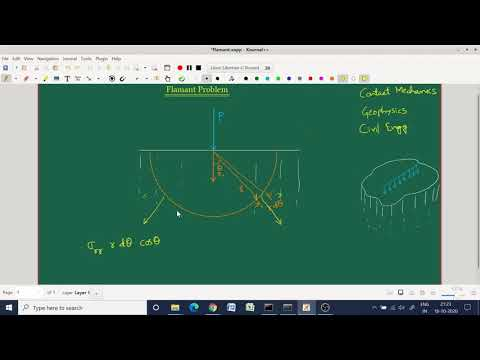

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('Zedr1CqfZEI')

# Flamant problem (Vertical point loading on half space)

Consider an infinite half-space in $x \geq 0$. A point load, $P$, acts vertically at the origin. We wish to find the stress distribution in the half-space. This problem is of a special kind, and we need to approach it a bit differently. First, we note that if we consider a semi-circle around the origin, then the following "force-balance" must hold:

\begin{gather}
\int_{-\pi/2}^{\pi/2} \sigma_{rr} \cos\theta \; r {\rm d} \theta = - P
\end{gather}

Now, note that in the RHS we have a constant value and in the LHS we have an integration with respect to $\theta$ while in the integrand, we have apparently an $r$-dependence. Now, the only possibile way in which this $r$-dependence can disappear is if $\sigma_{rr}$ is proportional to $\displaystyle \frac{1}{r}$. Thus, $\sigma_{rr}$ must be of the form $\displaystyle \sigma_{rr} = \frac{h(\theta)}{r}$, where it is important to note that $h(\theta)$ must be symmetric in $\theta$ about $\theta = 0$. We will use this form of $\sigma_{rr}$ to motivate the form of the Airy stress function. 

Towards that end, we first remind ourselves of the expression of $\sigma_{rr}$ in terms of a generic Airy stress function:

In [1]:
from polarUtilities import *

In [3]:
phi = Function('varphi')(r,theta)
sigma_rr(phi)

Derivative(varphi(r, theta), r)/r + Derivative(varphi(r, theta), (theta, 2))/r**2

So, if our unknown Airy stress function is $\varphi$, we must have:

\begin{gather*}
\frac{1}{r} \frac{\partial \varphi}{\partial r} + \frac{1}{r^2} \frac{\partial^2 \varphi}{\partial \theta^2} = \frac{h(\theta)}{r}, 
\end{gather*}

from which we obtain:
\begin{gather*}
\frac{\partial \varphi}{\partial r} + \frac{1}{r} \frac{\partial^2 \varphi}{\partial \theta^2} = h(\theta). 
\end{gather*}

From the above, we can deduce that $\varphi$ must be of the form $\varphi = r g(\theta)$. We set it up in our code:

In [4]:
g = Function('g')(theta)
phi = r*g

from IPython.display import Math, Latex
display(Math(r'\varphi = {}'.format(latex(phi))))

<IPython.core.display.Math object>

Next, we take a look at the biharmonic of this $\phi$:

In [5]:
polarbiharmonic(phi)

(g(theta) + 2*Derivative(g(theta), (theta, 2)) + Derivative(g(theta), (theta, 4)))/r**3

So, the polar biharmonic equation becomes very easy to solve analytically. Nevertheless, we proceed with the solution through SymPy:

In [6]:
dsolve(polarbiharmonic(phi),g)

Eq(g(theta), (C1 + C2*theta)*exp(-I*theta) + (C3 + C4*theta)*exp(I*theta))

We rewrite $g(\theta)$ in a slightly different form as follows:

In [7]:
A, B, C, D = symbols('A, B, C, D')
gnew = A*cos(theta) + B*theta*cos(theta) + C*sin(theta) + D*theta*sin(theta)
display(Math(r'g(\theta) = {}'.format(latex(gnew))))

<IPython.core.display.Math object>

Next, we find the expressions of $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$ as follows:

In [9]:
phi = r*gnew
sigmarr = sigma_rr(phi)
display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))

sigmatt = sigma_tt(phi)
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(latex(sigmatt))))

sigmart = sigma_rt(phi)
display(Math(r'\sigma_{{r\theta}} = {}'.format(latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing the form of $\sigma_{rr}$ just obtained with the previous general form $\displaystyle \sigma_{rr} = \frac{h(\theta)}{r}$, we find that $h(\theta) = -2B\sin\theta + 2D\cos\theta$. But we had already noted that $h(\theta)$ must be symmetric in $\theta$ about $\theta=0$. Therefore, we must have $B=0$. Consequently, the expression of $\sigma_{rr}$ becomes:

In [10]:
sigmarr = sigmarr.subs(B,0)
display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))

<IPython.core.display.Math object>

The unknown $D$ can be readily found by using the "force-balance" condition. Thus, we have:

In [12]:
P = symbols('P')
lhs = integrate(r*sigmarr*cos(theta),(theta,-pi/2,pi/2))
rhs = -P
eq = Eq(lhs,rhs)
display(eq)

Eq(pi*D, -P)

The solution for $D$ can be easily found now:

In [13]:
Dsoln = -P/pi
display(Math(r'D = {}'.format(latex(Dsoln))))

<IPython.core.display.Math object>

Finally, we can find the expression of $\sigma_{rr}$:

In [14]:
sigmarr_soln = sigmarr.subs(D,Dsoln)
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(latex(sigmarr_soln))))

<IPython.core.display.Math object>